In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
# 忽略警告信息
import warnings
warnings.filterwarnings("ignore")

## 数据集的准备

In [2]:
train = pd.read_csv('datas/house_data.csv')
y = train['SalePrice']
train.shape

(1460, 82)

In [3]:
train1 = train.drop(['Id', 'SalePrice'], axis=1)
train1.shape

(1460, 80)

In [4]:
# 变成one_hot形式，内容全部被数字化了,原特征删除
X = pd.get_dummies(train1).reset_index(drop=True)
X.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [178]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=123)

In [179]:
X_train.shape

(1168, 303)

In [180]:
X_test.shape

(292, 303)

<br><br>

## 基础线性回归

In [181]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error #方差

In [182]:
lm=LinearRegression()

In [183]:
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [184]:
pred=lm.predict(X_test)

In [185]:
np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))

0.12627809622157107

In [186]:
np.sqrt(mean_squared_error(y_test, pred))

24973.913406557556

In [187]:
def benchmark(model):
    pred = model.predict(X_test)
    # 方差
    logrmse = np.sqrt(mean_squared_error(np.log(y_test), np.log(pred)))
    return logrmse

In [188]:
benchmark(lm)

0.12627809622157107

## 数据预处理 Preprocessing

先用机器学习参数去跑结果

In [189]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import RobustScaler

In [190]:
# 把机器学习方法，直接放进 make_pipeline
lm_model = make_pipeline(RobustScaler(), LinearRegression())

In [191]:
# 将数据变换后的数据，进行机器学习
lm_model.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('linearregression', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False))])

In [192]:
# 评测模型
benchmark(lm_model)

0.1262780962215701

In [193]:
benchmark(lm)

0.12627809622157107

<br><br>

## RidegeRegression

朴素的Ridge回归

In [194]:
from sklearn.linear_model import Ridge

In [195]:
ridge_model = Ridge(alpha=0.1)

In [196]:
ridge_model.fit(X_train, y_train)

Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001)

In [197]:
benchmark(ridge_model)

0.12658320875064985

### 朴素的Ridge回归

In [198]:
ridge_model_pipe=make_pipeline(RobustScaler(), Ridge(alpha=0.1))

In [199]:
ridge_model_pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridge', Ridge(alpha=0.1, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [200]:
benchmark(ridge_model_pipe)

0.12658566764241647

### 带有CV的回归

cross view data K折交叉

In [201]:
from sklearn.model_selection import KFold
from sklearn.linear_model import RidgeCV

In [202]:
kfolds=KFold(n_splits=10, shuffle=True, random_state=123)

In [203]:
r_alphas=[0.01, 0.1, 1, 3, 5, 7, 10, 100]

In [204]:
ridge_model_cv=make_pipeline(RobustScaler(), RidgeCV(alphas=r_alphas, cv=kfolds))

In [205]:
# RidgeCV()

In [206]:
ridge_model_cv.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('robustscaler', RobustScaler(copy=True, quantile_range=(25.0, 75.0), with_centering=True,
       with_scaling=True)), ('ridgecv', RidgeCV(alphas=array([1.e-02, 1.e-01, 1.e+00, 3.e+00, 5.e+00, 7.e+00, 1.e+01, 1.e+02]),
    cv=KFold(n_splits=10, random_state=123, shuffle=True),
    fit_intercept=True, gcv_mode=None, normalize=False, scoring=None,
    store_cv_values=False))])

In [207]:
benchmark(ridge_model_cv)

0.12385966794851841

In [208]:
def benchmark2(model, testset, label):
    pred=model.predict(testset)
    if pred[pred<0.].shape[0]>0:
        print('Neg Value') #拟合过程飞掉
    rmse=np.sqrt(mean_squared_error(label, pred))
    lrmse = np.sqrt(mean_squared_error(np.log(label), np.log(pred)))
    print('RMSE:', rmse)
    print('LRMSE:', lrmse)
    return lrmse

In [216]:
benchmark2(ridge_model_cv, X_test, y_test)

RMSE: 26907.89401651115
LRMSE: 0.12385966794851841


0.12385966794851841

In [210]:
r_alphas2=[.0001, .0003, .0005, .0007, .0009, .01, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 20, 30, 50, 60, 70, 80]

In [211]:
def ridge_train_test(alpha):
    m = make_pipeline(RobustScaler(), RidgeCV(alphas=[alpha], cv=kfolds))
    m.fit(X_train, y_train)
    return benchmark2(m, X_test, y_test)

In [212]:
ridge_train_test(.0001)

RMSE: 24973.969249187514
LRMSE: 0.12627904574538876


0.12627904574538876

In [213]:
# 要写很多很多野代码
scores=[]
for k in r_alphas2:
    scores.append(ridge_train_test(k))

RMSE: 24973.969249187514
LRMSE: 0.12627904574538876
RMSE: 24974.080818356953
LRMSE: 0.12628091580070192
RMSE: 24974.192243030993
LRMSE: 0.12628274791871882
RMSE: 24974.303534396597
LRMSE: 0.12628454294724462
RMSE: 24974.41470385531
LRMSE: 0.12628630171441804
RMSE: 24979.528134378408
LRMSE: 0.12633870541443962
RMSE: 25012.204406895882
LRMSE: 0.12641709913943752
RMSE: 25072.9559253397
LRMSE: 0.12658566764241647
RMSE: 25328.501950347712
LRMSE: 0.12762387547257187
RMSE: 25776.231528192795
LRMSE: 0.12993386266803697
RMSE: 26017.008304352777
LRMSE: 0.1313335955487695
RMSE: 26002.202070522948
LRMSE: 0.13104277583538673
RMSE: 25890.56856743901
LRMSE: 0.1297114290664527
RMSE: 25829.487235208777
LRMSE: 0.12861148518191537
RMSE: 25816.158578357008
LRMSE: 0.12775697253955354
RMSE: 25873.843585167822
LRMSE: 0.12652048146318898
RMSE: 26130.639014982968
LRMSE: 0.12506392340075112
RMSE: 26283.503890921842
LRMSE: 0.12462399114535541
RMSE: 26440.645901425927
LRMSE: 0.12430803900379399
RMSE: 26598.292894

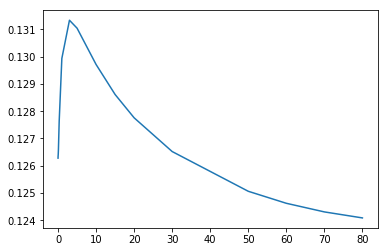

In [215]:
# 每一个alpha 的表现情况
plt.plot(r_alphas2, scores)